<a href="https://colab.research.google.com/github/tschelli/food_sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions Project
Coding Dojo Data Science Project 1

- Name: Tyler Schelling
- Start Date: 9/12/2022

---

**Data Dictionary Reference:**

Variable Name	   |  Description
-------------------|------------------
Item_Identifier	   |  Unique product ID
Item_Weight	       |  Weight of product
Item_Fat_Content	| Whether the product is low fat or regular
Item_Visibility	|The percentage of total display area of all products in a store allocated to the particular product
Item_Type	|The category to which the product belongs
Item_MRP	|Maximum Retail Price (list price) of the product
Outlet_Identifier	|Unique store ID
Outlet_Establishment_Year	|The year in which store was established
Outlet_Size|	The size of the store in terms of ground area covered
Outlet_Location_Type	|The type of area in which the store is located
Outlet_Type	|Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	|Sales of the product in the particular store. This is the target variable to be predicted.

## Mount Drive | Import Libraries | Load Data
- Section last updated: 10/05/2022

### Mounting the Google drive

In [2]:
#Dataset is stored via Google drive. Mount the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [146]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import math

from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches

### Load the data
 *Note: [Original Data Source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)*

In [4]:
#Load the data and examine the dataset we will be using
filename = '/content/drive/MyDrive/02. Life/Coding Dojo/00 Datasets/sales_predictions.csv'
df = pd.read_csv(filename)

## Exploring and Cleaning the Data
- Section last updated: 9/29/2022

### Display First 5 Rows 

In [5]:
#The .head() method will return the first 5 rows of our dataset.
#We will use .head() to gain a quick familiarity of our dataset.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Data appears to have been loaded correctly.

### Display Dataframe Info

In [6]:
#The .info() method will print a concise summary of the Dataframe.
#This method includes information on the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 1. How many rows and columns are in the dataframe?

In [7]:
#The .shape attribute returns the dimensions of the Dataframe in a tuple (rows, columns).
df.shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 8523 rows and 12 columns.


### 2. What are the datatypes of each variable?

In [8]:
#The .dtypes attribute returns a Series with the data type of each column.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Across each column, no inconsistent datatypes were found. 

### 3. Are there duplicates? If so, drop any duplicates.

In [9]:
#The .duplicated() method returns a boolean Series denoting duplicate rows
#Using .sum(), we can sum the 'True's that were returned for each duplicated row
df.duplicated().sum()

0

- No duplicated rows were found in our data.
- If duplicates were present, we would use `df.drop_duplicates(keep='first', inplace= True)` to drop them from our dataset.

### 4. Identify missing values.

In [10]:
#The .isna() method detects missing values. It will return a boolean same-sized object indicating if the values are NA.
#Using .sum(), we can sum the 'True's that are returned for missing values in each column.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

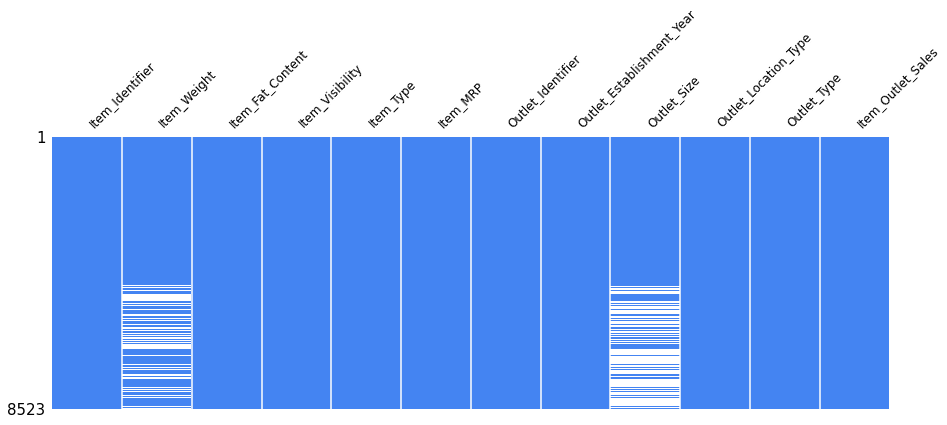

In [11]:
#The nullity matrix chart helps us understand the distribution of data within the whole dataset by column at the same time. 
msno.matrix(df, figsize = (15,5), fontsize = 12, color = [.27,.52,.95], sparkline = False, sort = 'descending');

We have identified that 2 columns with missing values:
- Item_Weight has 1463 missing values
- Outlet_Size has 2410 missing values

### 5. Decide on how to address the missing values. Explain your judgement and choice.

#### Item_Weight Missing Values

`Item_Weight` has 1463 missing values.

In [12]:
#The .isna() method will return the total count of null values in the 'Item_Weight' column by utilizing .sum()
df['Item_Weight'].isna().sum()

1463

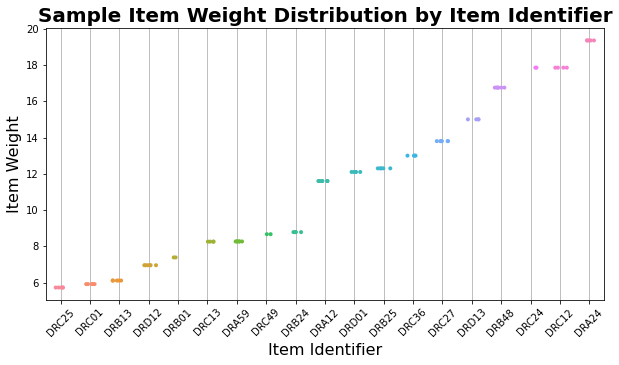

In [13]:
#Scatterplot of the Item_Weight distribution by Item_Identifier. Used a sample of the first 100 lines of sorted data by weight to make the chart more readable. 
plt.figure(figsize = (10, 5))

sns.stripplot(data=df.sort_values(by = ['Item_Identifier']).head(100).sort_values(by = ['Item_Weight']), x='Item_Identifier', y='Item_Weight', size = 4, jitter = .25)

plt.title('Sample Item Weight Distribution by Item Identifier', fontsize = 20, weight='bold')
plt.xlabel('Item Identifier', fontsize = 16)
plt.ylabel('Item Weight', fontsize = 16)
plt.xticks(fontsize = 10, rotation=45)
plt.yticks(fontsize = 10);

plt.grid(axis='x')
plt.show;

- Scatterplot of a sample of `Item_Weight`'s across `Item_Identifier`'s shows consistent `Item_Weight`'s in each `Item_Identifier` grouping.

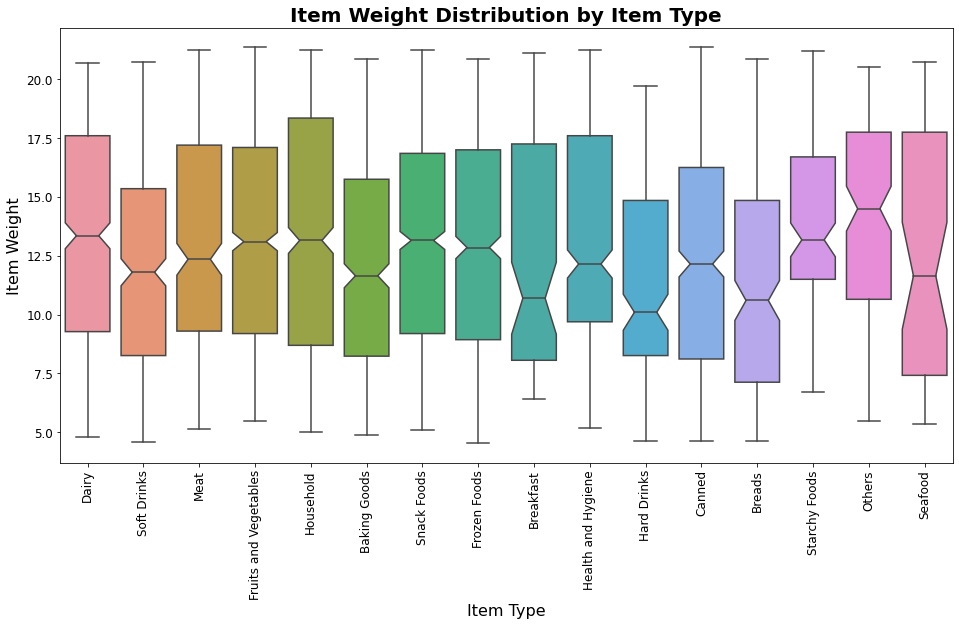

In [14]:
#Boxplot of the Item_Weight distribution by Item_Type in order to find the variation within each grouping. 
plt.figure(figsize = (16, 8))

sns.boxplot(data=df, x='Item_Type', y='Item_Weight', notch=True)

plt.title('Item Weight Distribution by Item Type', fontsize = 20, weight='bold')
plt.xlabel('Item Type', fontsize = 16)
plt.ylabel('Item Weight', fontsize = 16)
plt.xticks(fontsize = 12, rotation=90)
plt.yticks(fontsize = 12);

plt.show;

- Boxplot is used to visualize the `Item_Weight`by `Item_Type`'s and provides an indication of where the median lies of each `Item_Type` group.

In [15]:
#Loop through the index of the Dataframe
for ind in df.index:
    #Create a variable to hold the Item_Identifier of the current index
    item_id = df.loc[ind,'Item_Identifier']

    #Check if the location of the Item_Weight at the index is null
    #Create a filter to filter out only 'Item_Identifier' values equivalent to the item_id
    #Replace the null value with the .mean() of the 'Item_Weight' for the current 'Item_Identifier'. Values across 'Item_Identifier's are consistent.
    if df.isnull().loc[ind, 'Item_Weight']:
        item_filter = df['Item_Identifier'] == item_id
        df.loc[ind, 'Item_Weight'] = df[item_filter]['Item_Weight'].mean()

        #Additional check for the case of the null 'Item_Weight' being the only value for the 'Item_Identifier'
        #Create a new filter to filter out only the 'Item_Type' values of the current index.
        #Replace the null values with the .mean() of the 'Item_Weight' for the item's 'Item_Type'
        if math.isnan(df[item_filter]['Item_Weight'].mean()):
            type_filter = df['Item_Type'] == df.loc[ind, 'Item_Type']
            df.loc[ind, 'Item_Weight'] = df[type_filter]['Item_Weight'].median()

- Unique `Item_Identifier`'s have consistent `Item_Weight`'s.
    - The logic that was run updates null `Item_Weight` values with it's relevant `Item_Identifier`'s `Item_Weight` value.
- In the case that the `Item_Identifier` only had null `Item_Weight` entries, the `Item_Weight` will be filled using the median `Item_Weight` of it's `Item_Type`.

In [16]:
#The .isna() method will return the total count of null values in the 'Item_Weight' column by utilizing .sum()
df['Item_Weight'].isna().sum()

0

- No null values in `Item_Weight` left.

#### Outlet_Size Missing Values

`Outlet_Size` has 2410 missing values.
- Out of 8523 rows, this is a significant portion of the data (28.3%).


##### Missing Value Overview - Outlet_Size

In [17]:
#The .unique() method will return all values in the 'Outlet_Size' column.
print(df['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [18]:
#The .replace() method will replace 'High' with 'Large' inside the 'Outlet_Size' column in order to keep the language consistent.
df['Outlet_Size'].replace('High', 'Large', inplace = True)
print(df['Outlet_Size'].unique())

['Medium' nan 'Large' 'Small']


- For consistency in language, "High" was replaced with "Large"
- `Outlet_Size` contains three unique values: Small, Medium, Large

In [19]:
#The .groupby() method utilizes a lambda function to find the NaN 'Outlet_Size' values grouped by 'Outlet_Type' and 'Outlet_Location_Type'. 
df.groupby(['Outlet_Type','Outlet_Location_Type'])[['Outlet_Size']].apply(lambda x: x.isnull().sum())

Outlet_Size
Outlet_Type       Outlet_Location_Type             
Grocery Store     Tier 1                          0
                  Tier 3                        555
Supermarket Type1 Tier 1                          0
                  Tier 2                       1855
                  Tier 3                          0
Supermarket Type2 Tier 3                          0
Supermarket Type3 Tier 3                          0

- Two categories of missing `Outlet_Size` data.
    - Grocery Store: Tier 3
    - Supermarket Type1: Tier 2

##### Grocery Store Missing Values

In [20]:
#The .groupby() method will sum the 'Item_Outlet_Sales' values grouped by 'Outlet_Type' and 'Outlet_Location_Type' with a displayed .agg of both the average sales and total sales.
round(df.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].agg(['sum', 'mean']).rename(columns = {'sum':'Total Sales', 'mean':'Average Sales'}),2)

Total Sales  Average Sales
Outlet_Type       Outlet_Location_Type                            
Grocery Store     Tier 1                  179694.09         340.33
                  Tier 3                  188340.17         339.35
Supermarket Type1 Tier 1                 4302364.98        2313.10
                  Tier 2                 6472313.71        2323.99
                  Tier 3                 2142663.58        2299.00
Supermarket Type2 Tier 3                 1851822.83        1995.50
Supermarket Type3 Tier 3                 3453926.05        3694.04

In [21]:
#The .value_counts() method will provide the counts of 'Outlet_Size' filtered by only Grocery Store 'Outlet_Type's.
store_filter = df['Outlet_Type'] == 'Grocery Store'
df[store_filter].value_counts('Outlet_Size')

Outlet_Size
Small    528
dtype: int64

- Sales data for the missing values in Grocery Store - Tier 3 indicate that the `Outlet_Size` is nearly identical to Grocery Store - Tier 1.
    - All `Outlet_Size`'s for Grocery Store's are Small.
    - Using this information, the missing values with the Grocery Store `Outlet_Type` will be imputed as Small.

In [22]:
#Update null values with 'Small' with the Outlet_Type 'Grocery Store'
df.loc[store_filter & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
df[store_filter]['Outlet_Size'].isna().sum()

0

- Separately, the following can be noted:
    - Grocery Store Tier 3 only contained missing values
    - Total Sales and Avg Sales for Grocery Store Tier 3 are close to the sales values for Grocery Store Tier 1.

- Without further knowledge of the `Outlet_Location_Type` column from a SME, it is safe to assume that these rows were incorrectly identified as Tier 3 and will be imputed as Tier 1.

In [23]:
#Replace grocery store Outlet_Location_Type Tier 3 with Tier 1
df.loc[store_filter, 'Outlet_Location_Type'] = df.loc[store_filter, 'Outlet_Location_Type'].replace('Tier 3', 'Tier 1')
df[store_filter]['Outlet_Location_Type'].unique()

array(['Tier 1'], dtype=object)

- Missing values in `Outlet_Size` of Grocery Store have been imputed.
- Grocery Store `Outlet_Location_Type` Tier 3 has been updated to Tier 1.

##### Supermarket Type1 Missing Values

In [24]:
#The .groupby() method utilizes a lambda function to find the NaN 'Outlet_Size' values grouped by 'Outlet_Type' and 'Outlet_Location_Type'. 
df.groupby(['Outlet_Type','Outlet_Location_Type'])[['Outlet_Size']].apply(lambda x: x.isnull().sum())

Outlet_Size
Outlet_Type       Outlet_Location_Type             
Grocery Store     Tier 1                          0
Supermarket Type1 Tier 1                          0
                  Tier 2                       1855
                  Tier 3                          0
Supermarket Type2 Tier 3                          0
Supermarket Type3 Tier 3                          0

In [25]:
#The .value_counts() method is utilized to list all values with their counts in the Outlet_Location_Type column.
df['Outlet_Location_Type'].value_counts()

Tier 1    2943
Tier 3    2795
Tier 2    2785
Name: Outlet_Location_Type, dtype: int64

In [26]:
#Two filters are created to get the value counts of the Outlet_Size for Supermarket Type1 Tier 2 outlets.
store_filter2 = df['Outlet_Type'] == 'Supermarket Type1'
tier_filter = df['Outlet_Location_Type'] == 'Tier 2'
df[tier_filter & store_filter2].value_counts('Outlet_Size')

Outlet_Size
Small    930
dtype: int64

- Only `Outlet_Size` Small is applied to values to Supermarket Type1 Tier 2 Outlets.
    - Before imputing all missing values in this category as Small, a further investigation into the sales comparison is warranted.

In [27]:
#The .groupby() method will sum the 'Item_Outlet_Sales' values grouped by 'Outlet_Type', 'Outlet_Location_Type', and 'Outlet_Size' with a displayed .agg of both the average sales and total sales.
round(df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'])['Item_Outlet_Sales'].agg(['sum', 'mean']).rename(columns = {'sum':'Total Sales', 'mean':'Average Sales'}),2)

Total Sales  Average Sales
Outlet_Type       Outlet_Location_Type Outlet_Size                            
Grocery Store     Tier 1               Small          368034.27         339.83
Supermarket Type1 Tier 1               Medium        2183969.81        2348.35
                                       Small         2118395.17        2277.84
                  Tier 2               Small         2268122.94        2438.84
                  Tier 3               Large         2142663.58        2299.00
Supermarket Type2 Tier 3               Medium        1851822.83        1995.50
Supermarket Type3 Tier 3               Medium        3453926.05        3694.04

In [28]:
#The .groupby() method will sum the 'Item_Outlet_Sales' values grouped by 'Outlet_Type' and 'Outlet_Location_Type' with a displayed .agg of both the average sales and total sales.
round(df.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].agg(['sum', 'mean']).rename(columns = {'sum':'Total Sales', 'mean':'Average Sales'}),2)

Total Sales  Average Sales
Outlet_Type       Outlet_Location_Type                            
Grocery Store     Tier 1                  368034.27         339.83
Supermarket Type1 Tier 1                 4302364.98        2313.10
                  Tier 2                 6472313.71        2323.99
                  Tier 3                 2142663.58        2299.00
Supermarket Type2 Tier 3                 1851822.83        1995.50
Supermarket Type3 Tier 3                 3453926.05        3694.04

- The sales information provides no relevant insights.
- Without a SME to provide additional information on the matter, it is safe to assume that all Supermarket Type1 Tier 2 outlets have an `Outlet_Size` of Small.

In [29]:
# Update null values with 'Small' with the Outlet_Type 'Supermarket Type1'
df.loc[store_filter2 & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
df[store_filter]['Outlet_Size'].isna().sum()

0

- Missing values in `Outlet_Size` of Supermarket Type1 have been imputed.

### 6. Confirm that there are no missing values after addressing them.

In [30]:
#The .isna() method will return the total count of null values in the 'Item_Weight' column by utilizing .sum()
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- No further columns with missing values.

### 7. Find and fix any inconsistent categories of data.

#### General Review

- Check for common syntax errors 
    - May include extra white spaces in strings or column names
    - Check for typos or inconsistencies in strings that need correction

In [31]:
#The .info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
#The .describe() method will give descriptive statistics.
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [33]:
#The .describe() method will give descriptive statistics only for object columns.
df.describe(include = 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 1,Supermarket Type1
freq,10,5089,1232,935,4798,2943,5577


In [34]:
#The .dtypes method will return a Series with the data type of each column.
df.dtypes[(df.dtypes == 'object')]

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

- No concerns present 

#### Item_Fat_Content Column

In [35]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

- Inconsistent string names:
    - Replace 'low fat' and 'LF' with 'Low Fat'.
    - Replace 'reg' with 'Regular'.

In [36]:
# Use df['Item_Fat_Content'].replace() to replace the inconsistent data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat').replace('reg','Regular')
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [37]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Inconsistent string names corrected.

#### Item_Visibility Column

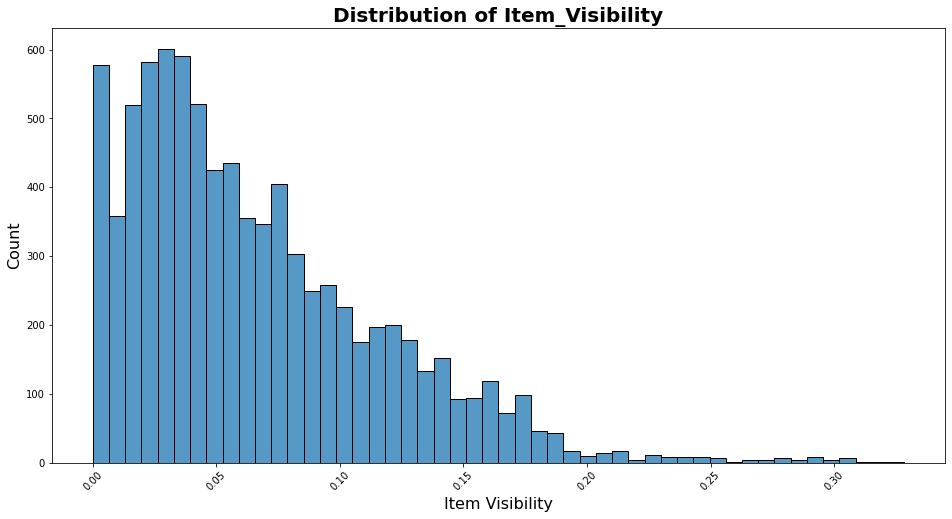

In [38]:
#Bar chart of the distribution of values in Item_Visibility
plt.figure(figsize = (16, 8))

sns.histplot(data=df['Item_Visibility'], bins = 'auto')

plt.title('Distribution of Item_Visibility', fontsize = 20, weight='bold')
plt.xlabel('Item Visibility', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 10, rotation=45)
plt.yticks(fontsize = 10);

plt.show;

- No concerns present.

#### Item_Type Column

In [39]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Item_Type'])['Item_Type'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

- No concerns present.

#### Item_MRP Column

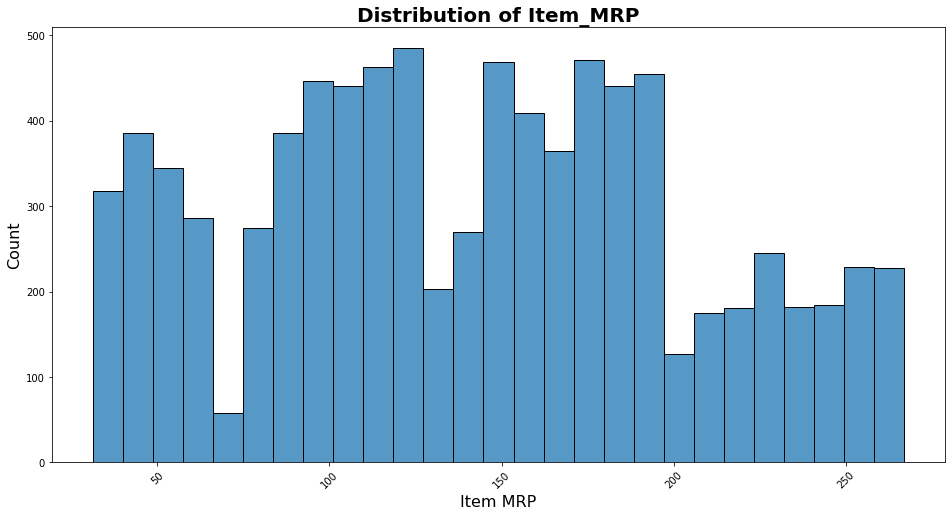

In [40]:
#Bar chart of the distribution of values in Item_MRP
plt.figure(figsize = (16, 8))

sns.histplot(data=df['Item_MRP'], bins = 'auto')

plt.title('Distribution of Item_MRP', fontsize = 20, weight='bold')
plt.xlabel('Item MRP', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 10, rotation=45)
plt.yticks(fontsize = 10);

plt.show;

- No concerns present.

#### Outlet_Identifier Column

In [41]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Outlet_Identifier'])['Outlet_Identifier'].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Outlet_Identifier, dtype: int64

- No concerns present.

#### Outlet_Establishment_Year Column

In [42]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Outlet_Establishment_Year'])['Outlet_Establishment_Year'].count()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Establishment_Year, dtype: int64

- No concerns present.

#### Outlet_Size Column

In [43]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
Large      932
Medium    2793
Small     4798
Name: Outlet_Size, dtype: int64

- No concerns present.

#### Outlet_Location_Type Column

In [44]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Location_Type
Tier 1    2943
Tier 2    2785
Tier 3    2795
Name: Outlet_Location_Type, dtype: int64

- No concerns present.

#### Outlet_Type Column

In [45]:
#Using groupby to perform a count of the values in the specified column
df.groupby(['Outlet_Type'])['Outlet_Type'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

- No concerns present.

#### Item_Outlet_Sales Column

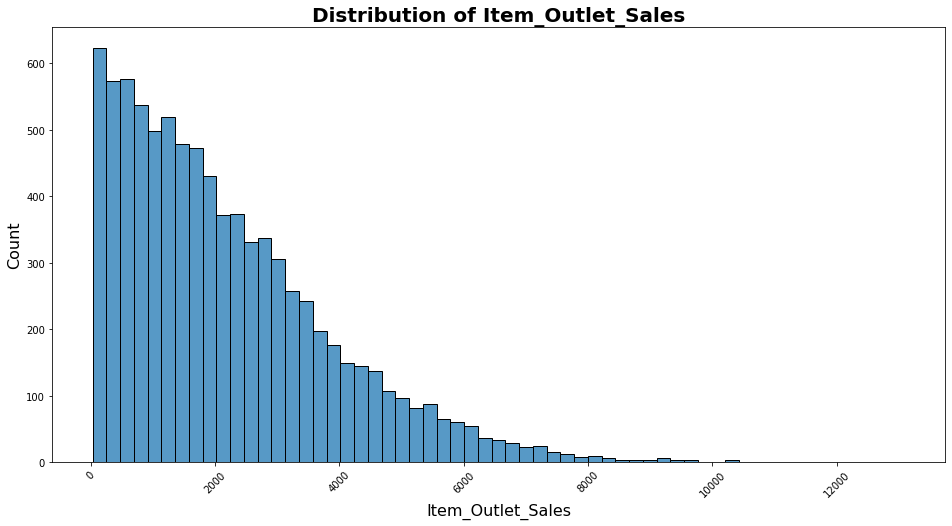

In [46]:
#Bar chart of the distribution of values in Item_Outlet_Sales
plt.figure(figsize = (16, 8))

sns.histplot(data=df['Item_Outlet_Sales'], bins = 'auto')

plt.title('Distribution of Item_Outlet_Sales', fontsize = 20, weight='bold')
plt.xlabel('Item_Outlet_Sales', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 10, rotation=45)
plt.yticks(fontsize = 10);

plt.show;

- No concerns present.

## Exploratory Visualization
- Section last updated: 10/06/2022

### Correlation Heatmap

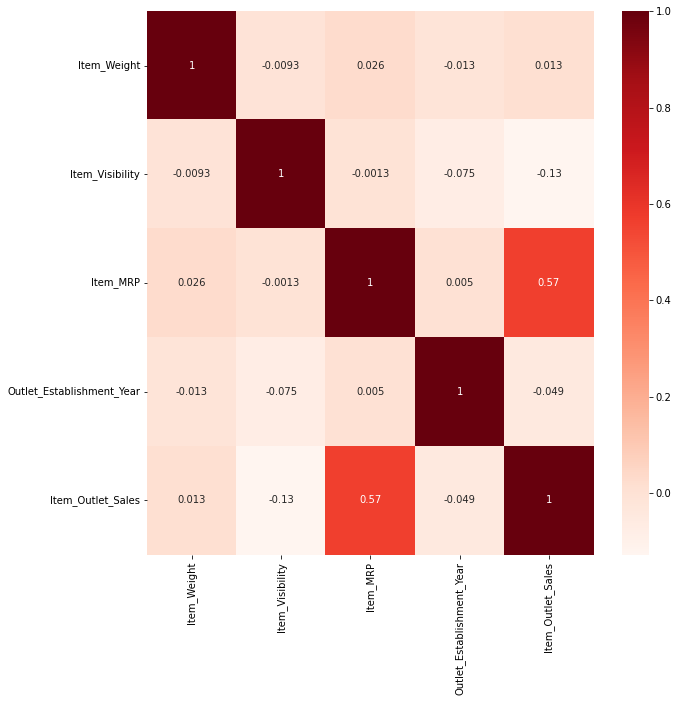

In [47]:
#The .corr() method is used to find the pairwise correlation of all columns; plotted using a heatmap.
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'Reds', annot = True);

- Numerical column correlation shows that `Item_MRP` and `Item_Outlet_Sales` have the highest positive correlation.

### Pairwise Plot

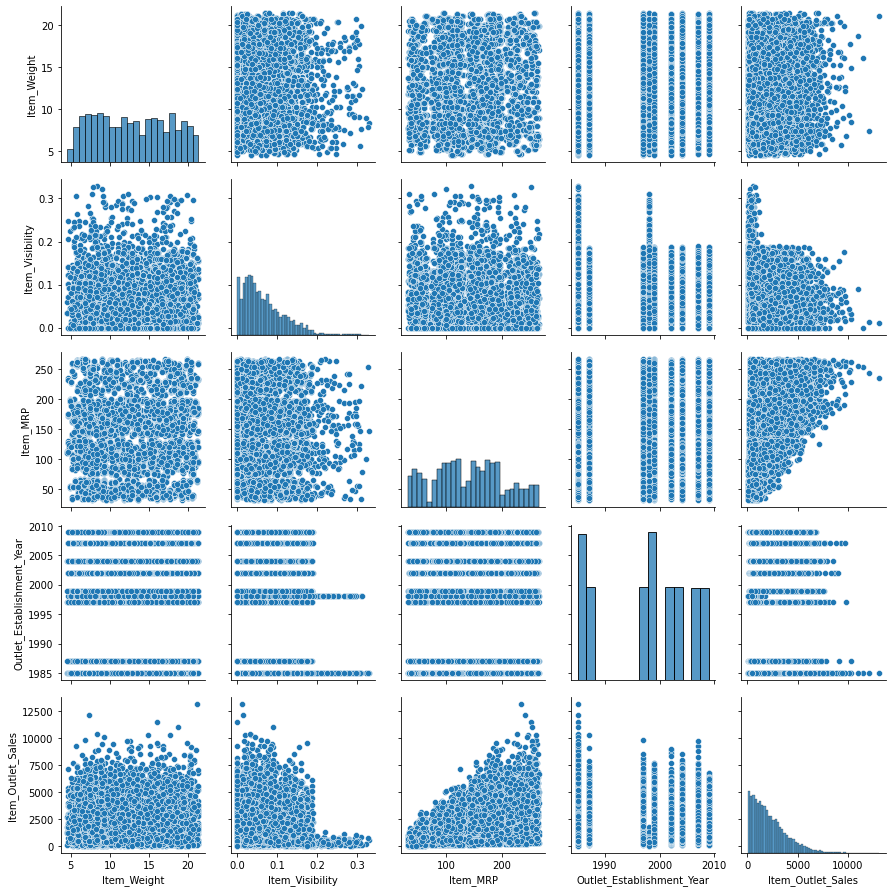

In [48]:
#Pairwise relationships plotted across all numeric columns
sns.pairplot(df);
plt.tight_layout()
plt.show;

- Pairwise relationships across all numerical columns shows a quick exploratory view of our data set.

### Item Type Distribution

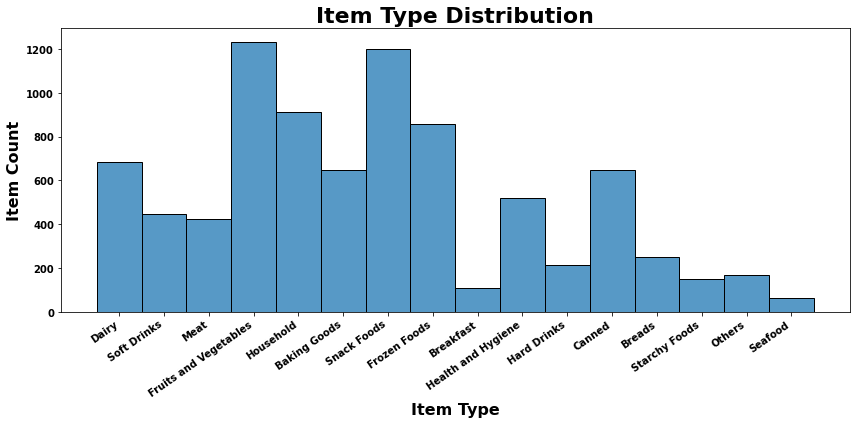

In [108]:
plt.figure(figsize = (12, 6))

sns.histplot(data=df, x='Item_Type'); 

plt.title('Item Type Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item Type', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=35, horizontalalignment = 'right')
plt.yticks(fontsize = 10, weight='bold')

plt.tight_layout()
plt.show;

### Outlet Size Distribution

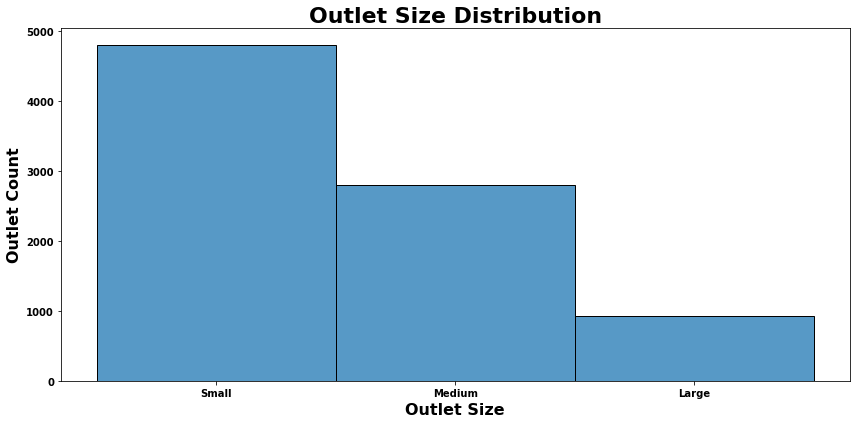

In [61]:
plt.figure(figsize = (12, 6))

sns.histplot(data=df.sort_values('Outlet_Size', ascending = False), x='Outlet_Size', bins='auto')

plt.title('Outlet Size Distribution', fontsize = 22, weight='bold')
plt.xlabel('Outlet Size', fontsize = 16, weight='bold')
plt.ylabel('Outlet Count', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold')

plt.tight_layout()
plt.show;

### Outlet Type Distribution

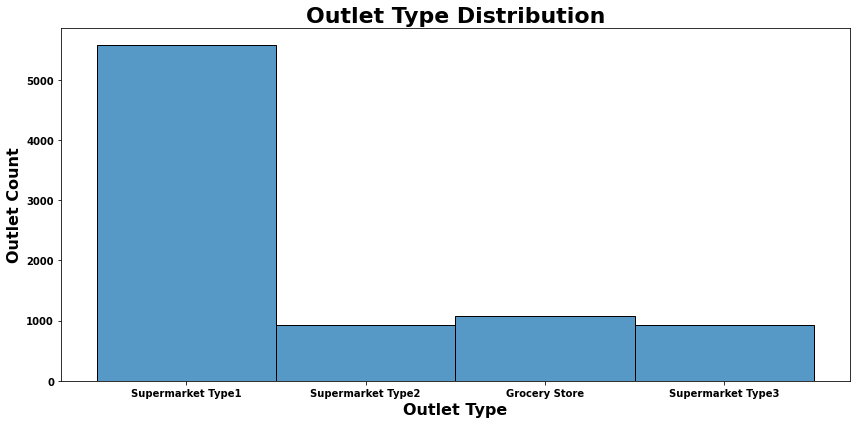

In [53]:
plt.figure(figsize = (12, 6))

sns.histplot(data=df, x='Outlet_Type')

plt.title('Outlet Type Distribution', fontsize = 22, weight='bold')
plt.xlabel('Outlet Type', fontsize = 16, weight='bold')
plt.ylabel('Outlet Count', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold')

plt.tight_layout()
plt.show;

## Explanatory Visualization

### What Item_Type's have the highest sales?

In [154]:
item_outlet_sales_df = round(df.groupby(['Item_Type','Outlet_Type'])['Item_Outlet_Sales'].agg(['sum']).sort_values(by = 'sum',ascending = False),2).reset_index()
display(item_outlet_sales_df)

item_sales_df = item_outlet_sales_df.groupby(['Item_Type'])[['sum']].sum().sort_values(by = 'sum',ascending = False).reset_index()
item_sales_df

,Item_Type,Outlet_Type,sum
0,Fruits and Vegetables,Supermarket Type1,1931957.85
1,Snack Foods,Supermarket Type1,1889387.27
2,Household,Supermarket Type1,1437219.85
3,Frozen Foods,Supermarket Type1,1292668.01
4,Dairy,Supermarket Type1,1076694.48
...,...,...,...
59,Breakfast,Grocery Store,7843.79
60,Others,Grocery Store,7778.54
61,Hard Drinks,Grocery Store,5835.74
62,Starchy Foods,Grocery Store,3901.59


,Item_Type,sum
0,Fruits and Vegetables,2820059.82
1,Snack Foods,2732786.09
2,Household,2055493.72
3,Frozen Foods,1825734.79
4,Dairy,1522594.06
5,Canned,1444151.50
6,Baking Goods,1265525.35
7,Health and Hygiene,1045200.14
8,Meat,917565.61
9,Soft Drinks,892897.72


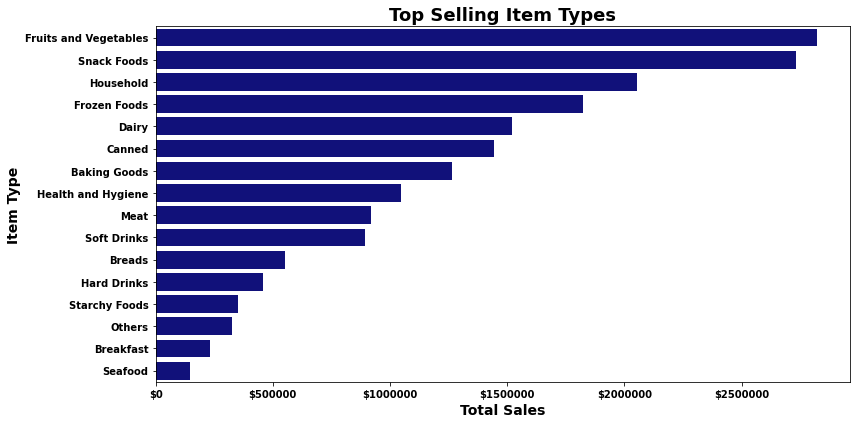

In [163]:
fig, axes = plt.subplots(figsize=(12,6))

sns.barplot(data=item_sales_df, y='Item_Type', x='sum', orient = 'h', color = 'darkblue'); 

#sns.barplot(data=item_outlet_sales_df[item_outlet_sales_df.Outlet_Type=='Supermarket Type1'], y = 'Item_Type', x='sum', orient = 'h',color = 'lightblue')
#sns.barplot(data=item_outlet_sales_df[item_outlet_sales_df.Outlet_Type=='Supermarket Type3'], y = 'Item_Type', x='sum', orient = 'h',color = 'green')
#sns.barplot(data=item_outlet_sales_df[item_outlet_sales_df.Outlet_Type=='Supermarket Type2'], y = 'Item_Type', x='sum', orient = 'h',color = 'red')
#sns.barplot(data=item_outlet_sales_df[item_outlet_sales_df.Outlet_Type=='Grocery Store'], y = 'Item_Type', x='sum', orient = 'h',color = 'yellow')


plt.title('Top Selling Item Types', fontsize = 18, weight='bold')
plt.xlabel('Total Sales', fontsize = 14, weight='bold')
plt.ylabel('Item Type', fontsize = 14, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold')
axes.xaxis.set_major_formatter(StrMethodFormatter('${x:1.0f}'))

plt.tight_layout()
plt.show;

- `Fruits and Vegetables` and `Snack Foods` are the highest selling categories.
    - These categories make up ~28% of all sales.

### Total Sales by Item Visibility


In [190]:
item_visibility_df = round(df.groupby(['Item_Visibility'])['Item_Outlet_Sales'].agg('sum').sort_values(ascending = False).reset_index(),2)
item_visibility_df = item_visibility_df[item_visibility_df['Item_Outlet_Sales'] < 500000]

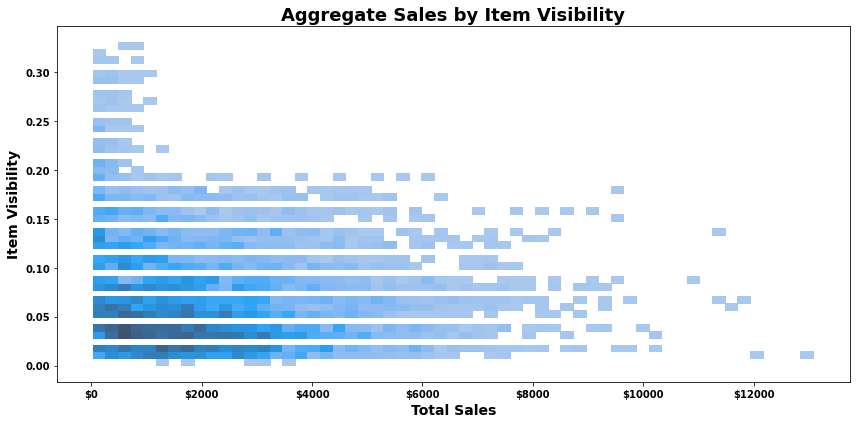

In [195]:
fig, axes = plt.subplots(figsize=(12,6))

sns.histplot(data=item_visibility_df, y='Item_Visibility', x='Item_Outlet_Sales'); 

plt.title('Aggregate Sales by Item Visibility', fontsize = 18, weight='bold')
plt.xlabel('Total Sales', fontsize = 14, weight='bold')
plt.ylabel('Item Visibility', fontsize = 14, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold')
axes.xaxis.set_major_formatter(StrMethodFormatter('${x:1.0f}'))

plt.tight_layout()
plt.show;

- 